<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

**Смотрим несколько первых строк датасета**

In [5]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


**Построение гистограммы для обнаружения выбросов**

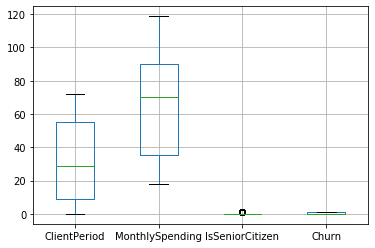

In [6]:
data.boxplot()

**Смотрим количество значений NaN в каждом столбце (axis = 0).**

In [7]:
data.isna().sum(axis = 0)

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

**Смотрим, есть ли в столбце "TotalSpent" ячейки с пробелами**

In [8]:
data[data.TotalSpent.str.isspace()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


**У перизнака 'TotalSpent' переводим данные типа "object" в числа, остальное - в NaN**

In [9]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')

**Заменяем NaN нулями**

In [10]:
data['TotalSpent'][data.TotalSpent.isna()] = 0

C:\Users\vanex\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, если вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

**Гистограммы численных призанков**

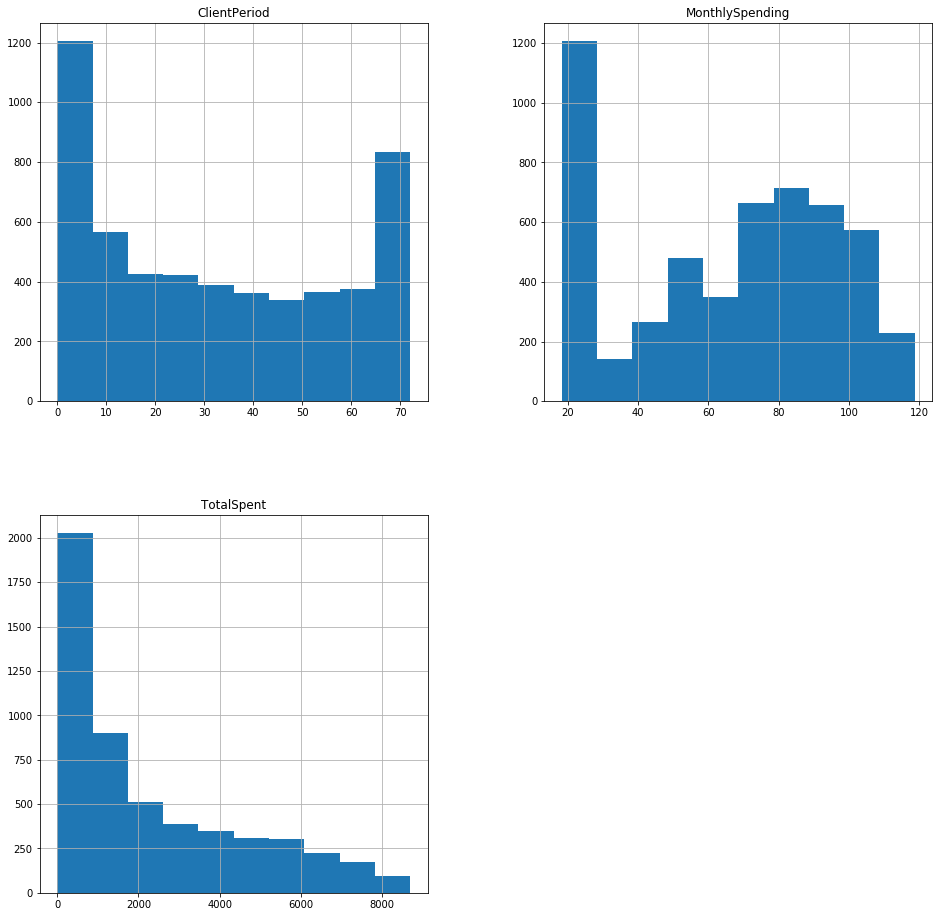

In [11]:
data[num_cols].hist(figsize=(16,16), bins=10);

**Считаем количество каждого значения для каждого признака в категориальных переменных.  
Выводим круговые диаграммы.**

Male      2655
Female    2627
Name: Sex, dtype: int64 

0    4440
1     842
Name: IsSeniorCitizen, dtype: int64 

No     2705
Yes    2577
Name: HasPartner, dtype: int64 

No     3676
Yes    1606
Name: HasChild, dtype: int64 

Yes    4761
No      521
Name: HasPhoneService, dtype: int64 

No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64 

Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64 

No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64 

No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64 

No                     2317
Yes                    1824
No internet service    1141
Name: HasDeviceProtection, dtype: int64 

No                     2604
Yes                    1537
No internet service    1141
Name: HasTechSupportAccess,

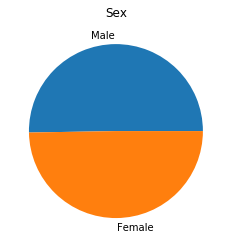

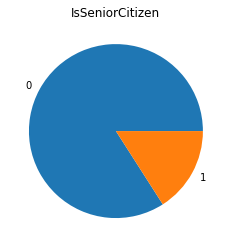

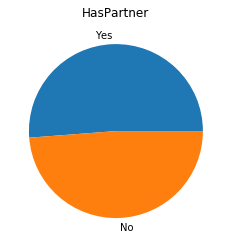

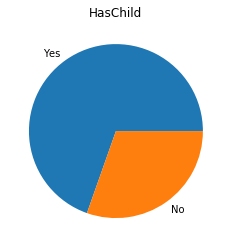

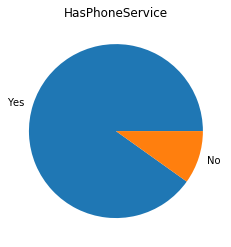

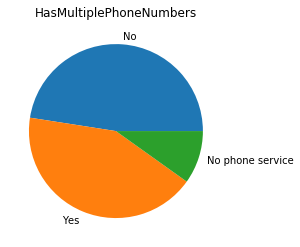

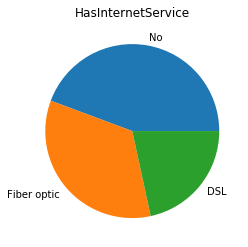

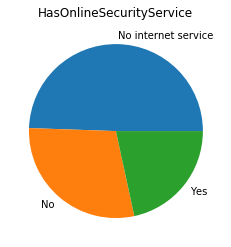

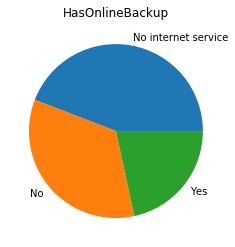

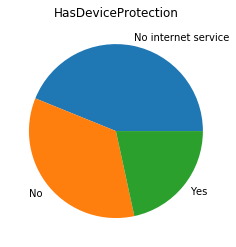

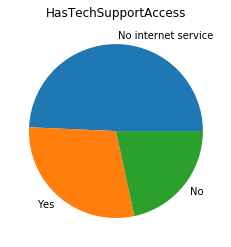

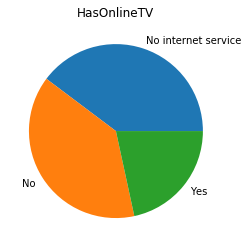

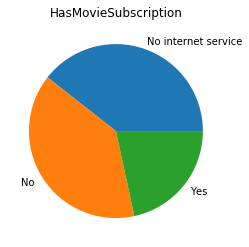

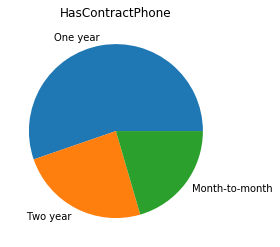

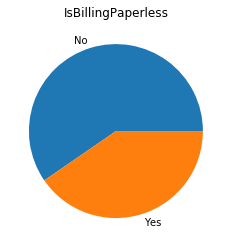

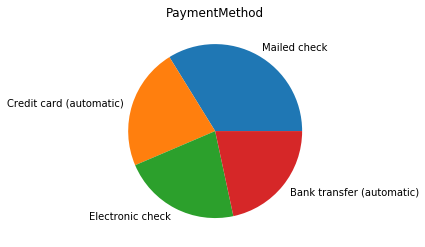

In [12]:
for col in data[cat_cols]:
    
    cnts = data[col].value_counts()
    print(cnts, '\n')
    
    fig, ax = plt.subplots()
    ax.pie(data[col].value_counts(), labels=data[col].unique())
    plt.title(col)

**Обзор целевой переменной**

In [13]:
data['Churn'].value_counts(normalize=True)

0    0.737978
1    0.262022
Name: Churn, dtype: float64

**Вывод**  
Классы целевой переменной достаточно сбалансированы

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

**Посмотрим типы данных у признаков**

In [14]:
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                  float64
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scoring='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [15]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

**Нормируем числовые признаки**

In [16]:
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [17]:
data[num_cols]

,ClientPeriod,MonthlySpending,TotalSpent
0,0.920767,-1.505447,-0.555852
1,1.613288,-1.294998,-0.183039
2,-1.279005,0.363737,-0.974768
3,-0.016173,0.476418,0.124519
4,1.124450,1.667856,1.970599
...,...,...,...
5277,-1.197532,-1.144204,-0.972013
5278,0.717084,-0.678565,-0.043651
5279,-1.279005,-0.327265,-0.983957
5280,-0.138382,0.367051,-0.031838


**Кодируйем с помощью 'one-hot-encoding' категориальные признаки**

In [18]:
dummy_features = pd.get_dummies(data[cat_cols])

X = pd.concat([data[num_cols], dummy_features], axis=1)

y = data['Churn']

X

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.920767,-1.505447,-0.555852,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,1.613288,-1.294998,-0.183039,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,-1.279005,0.363737,-0.974768,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,-0.016173,0.476418,0.124519,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,1.124450,1.667856,1.970599,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,-1.197532,-1.144204,-0.972013,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
5278,0.717084,-0.678565,-0.043651,0,0,1,0,1,1,0,...,0,0,1,0,0,1,1,0,0,0
5279,-1.279005,-0.327265,-0.983957,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
5280,-0.138382,0.367051,-0.031838,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0


**Разделяем обучающую выборку на 'train' и 'test'**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((3697, 45), (1585, 45), (3697,), (1585,))

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve

In [21]:
model = LogisticRegressionCV(random_state=42, scoring='roc_auc', refit=True)
model.fit(X_train, y_train)

y_test_predicted = model.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, y_test_predicted)
# 0.8301297087575599

0.8300557464487527

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [22]:
import catboost as catb

In [23]:
data_cat = pd.read_csv('./train.csv')

In [24]:
data_cat['TotalSpent'] = pd.to_numeric(data_cat['TotalSpent'], errors='coerce')

In [25]:
data_cat['TotalSpent'][data_cat.TotalSpent.isna()] = 0

C:\Users\vanex\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
X_cat = data_cat.drop(columns='Churn')

y_cat = data_cat['Churn']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat, shuffle=True, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((3697, 19), (1585, 19), (3697,), (1585,))

In [28]:
%%time

model_catb = catb.CatBoostRegressor(silent=True, random_state=42)
model_catb.fit(X_train, y_train, cat_features=cat_cols)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

Wall time: 50.4 s


In [29]:
roc_auc_score(y_test, y_test_pred)

0.8244800449690837

In [30]:
roc_auc_score(y_train, y_train_pred)

0.9219646092568469

**Подбор параметров:**  
learning_rate  
n_estimators  
l2_leaf_reg

In [31]:
%%time

for i in [0.005, 0.01, 0.015, 0.02]:
    model_catb = catb.CatBoostClassifier(silent=True, random_state=42, learning_rate=i)
    model_catb.fit(X_train, y_train, cat_features=cat_cols)

    y_train_pred = model_catb.predict_proba(X_train)[:, 1]
    y_test_pred = model_catb.predict_proba(X_test)[:, 1]
    
    print(i, roc_auc_score(y_test, y_test_pred), roc_auc_score(y_train, y_train_pred))

0.005 0.8361143161444926 0.8725023583846188
0.01 0.8344892585595522 0.8823811823368222
0.015 0.8318456343218924 0.8953771918003085
0.02 0.8301011804384486 0.9041730305616698
Wall time: 3min 14s


Выбираем learning_rate=0.005

In [32]:
%%time

for i in [n for n in range(500, 1500, 100)]:
    model_catb = catb.CatBoostClassifier(silent=True, random_state=42, learning_rate=0.005, n_estimators=i)
    model_catb.fit(X_train, y_train, cat_features=cat_cols)

    y_train_pred = model_catb.predict_proba(X_train)[:, 1]
    y_test_pred = model_catb.predict_proba(X_test)[:, 1]
    
    print(i, roc_auc_score(y_test, y_test_pred), roc_auc_score(y_train, y_train_pred))
#800 0.8357423913916325 0.8775229100220117

500 0.8336788429759052 0.8665414476738091
600 0.8342029187640264 0.8681503900693289
700 0.8349277493903393 0.8694982255963345
800 0.8353123533961377 0.8705138283694952
900 0.8358195235136745 0.8716080439632841
1000 0.8361143161444926 0.8725023583846188
1100 0.8362485049047576 0.8733163754248836
1200 0.8365739390635103 0.8740085425931747
1300 0.8365010333591145 0.874690602398814
1400 0.8364397503032455 0.8755583381998412
Wall time: 8min 43s


Выбираем n_estimators=1200

In [33]:
%%time

for i in [0.5, 1, 1.5, 2.5, 3, 3.5]:
    model_catb = catb.CatBoostClassifier(silent=True, random_state=42, learning_rate=0.005, n_estimators=1200, l2_leaf_reg=i)
    model_catb.fit(X_train, y_train, cat_features=cat_cols)

    y_train_pred = model_catb.predict_proba(X_train)[:, 1]
    y_test_pred = model_catb.predict_proba(X_test)[:, 1]
    
    print(i, roc_auc_score(y_test, y_test_pred), roc_auc_score(y_train, y_train_pred))

0.5 0.8361185425621389 0.8760468607280295
1 0.8365623164149835 0.8755725633769073
1.5 0.8366795995046638 0.8746260275818698
2.5 0.8366183164487947 0.8740757378374736
3 0.8365739390635103 0.8740085425931747
3.5 0.835634617741656 0.8741131725139631
Wall time: 5min 49s


Выбираем l2_leaf_reg=1.5

# Предсказания

**Обучаем модель на подобранных параметрах и на всем датасете**

In [34]:
%%time

model_catb = catb.CatBoostClassifier(silent=True, random_state=42, learning_rate=0.005, n_estimators=1200, l2_leaf_reg=1.5)
model_catb.fit(X_cat, y_cat, cat_features=cat_cols)

Wall time: 1min 10s


**Загружаем тестовую выборку**

In [35]:
X_test_ = pd.read_csv('./test.csv')

submission = pd.read_csv('./submission.csv', index_col='Id')

**Исправляем пропуски**

In [36]:
X_test_['TotalSpent'] = pd.to_numeric(X_test_['TotalSpent'], errors='coerce')

In [37]:
X_test_['TotalSpent'][X_test_.TotalSpent.isna()] = 0

C:\Users\vanex\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Делаем предсказание**

In [38]:
y_pred_proba = model_catb.predict_proba(X_test_)[:, 1]

**Выводим в файл**

In [39]:
submission['Churn'] = y_pred_proba

submission.to_csv('./my_submission.csv')

**Скор на Кагле**  
Score: 0.85257 (по этой модели)

Лучший скор: 0.85318.

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.